In [1]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.4 MB/s eta 0:00:00


In [2]:
from pandas._libs.tslibs.period import validate_end_alias
# TIME SERIES BIIIIITCH

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

from pmdarima import auto_arima

def test_stationary(timeseries):
  print('Results for DKFuller test: ')
  df_test = adfuller(timeseries, autolag='AIC')
  df_out = pd.Series(df_test[0:4], index=['tstatistic', 'pvalue', 'no_lags', 'obs'])
  for key, value in df_test[4].items():
    df_out['criticalvalue (%s)' %key] = value
  return df_out


In [3]:
flight_data = sns.load_dataset('flights')
flight_data.head(10)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
5,1949,Jun,135
6,1949,Jul,148
7,1949,Aug,148
8,1949,Sep,136
9,1949,Oct,119


In [4]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [5]:
flight_data['month'] = pd.to_datetime(flight_data.month, format='%b').dt.month
flight_data['date'] = pd.to_datetime(flight_data[['year', 'month']].assign(day = 1))
flight_data

,year,month,passengers,date
0,1949,1,112,1949-01-01
1,1949,2,118,1949-02-01
2,1949,3,132,1949-03-01
3,1949,4,129,1949-04-01
4,1949,5,121,1949-05-01
...,...,...,...,...
139,1960,8,606,1960-08-01
140,1960,9,508,1960-09-01
141,1960,10,461,1960-10-01
142,1960,11,390,1960-11-01


In [6]:
flight_data = flight_data.set_index('date')

ts = flight_data['passengers']

ts

date
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: passengers, Length: 144, dtype: int64

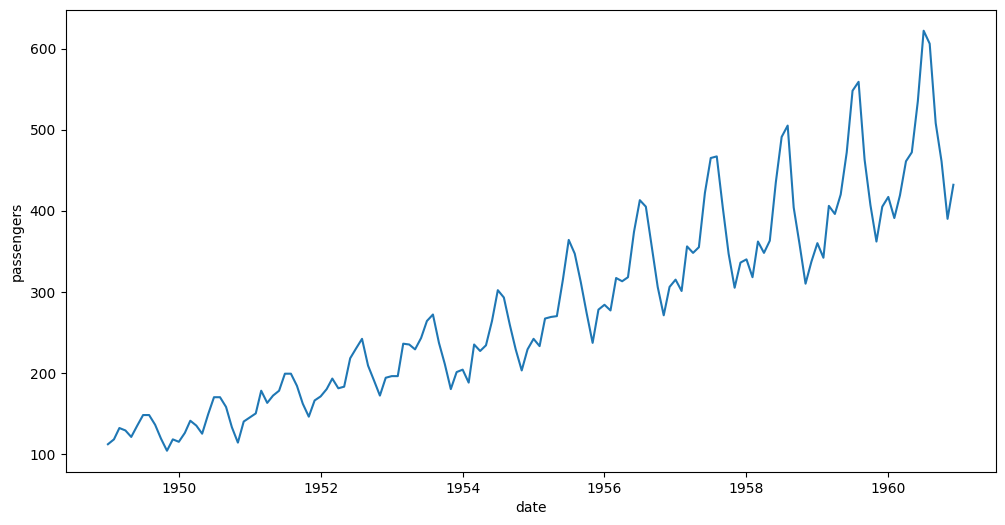

In [7]:
fig, axis = plt.subplots(figsize=(12,6))

sns.lineplot(data=ts)
plt.show()

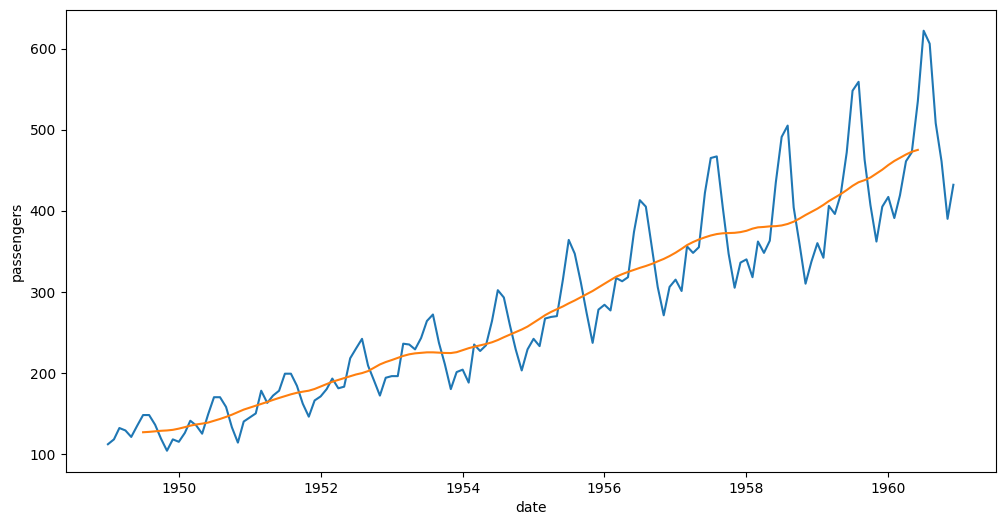

In [8]:
ts_deco = seasonal_decompose(ts, period=12)

trend = ts_deco.trend

fig, axis = plt.subplots(figsize=(12, 6))

sns.lineplot(data=ts)
sns.lineplot(data=trend)

plt.show()

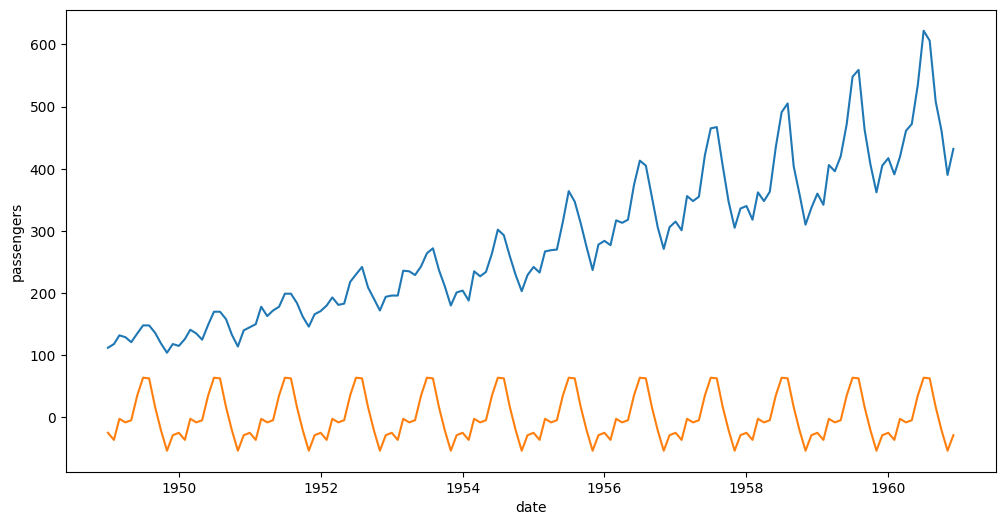

In [9]:
seasonal = ts_deco.seasonal

fig, axis = plt.subplots(figsize=(12, 6))

sns.lineplot(data=ts)
sns.lineplot(data=seasonal)

plt.show()

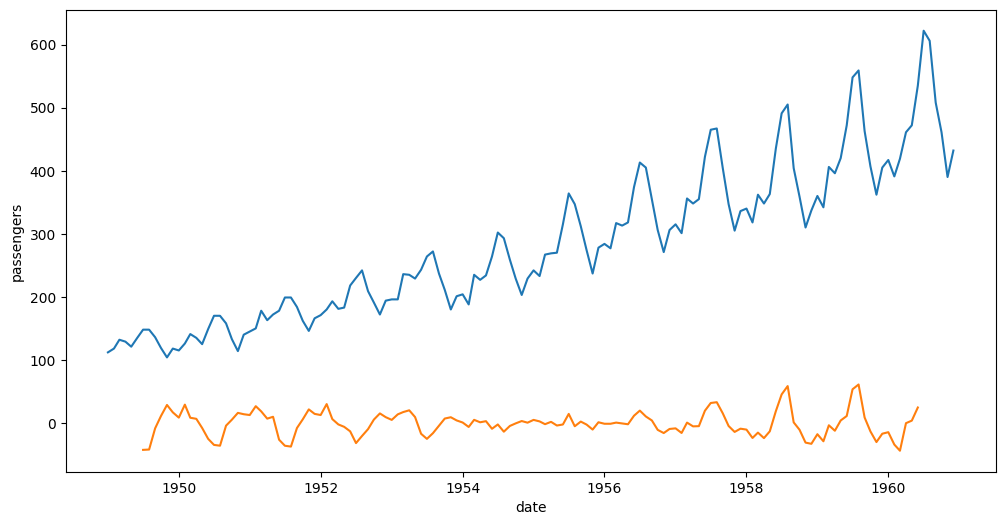

In [10]:
residuals = ts_deco.resid

fig, axis = plt.subplots(figsize=(12, 6))

sns.lineplot(data=ts)
sns.lineplot(data=residuals)

plt.show()

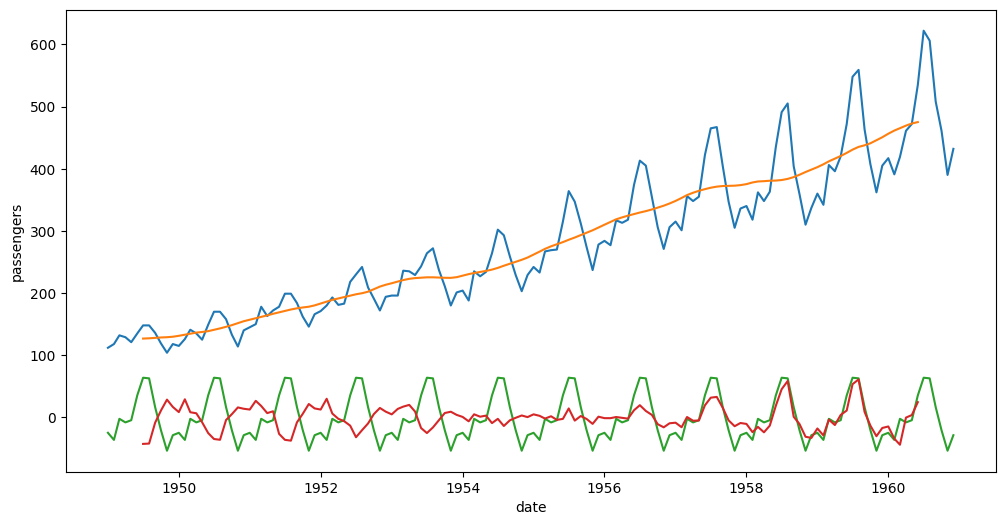

In [11]:
fig, axis = plt.subplots(figsize=(12, 6))

sns.lineplot(data=ts)
sns.lineplot(data=trend)
sns.lineplot(data=seasonal)
sns.lineplot(data=residuals)

plt.show()

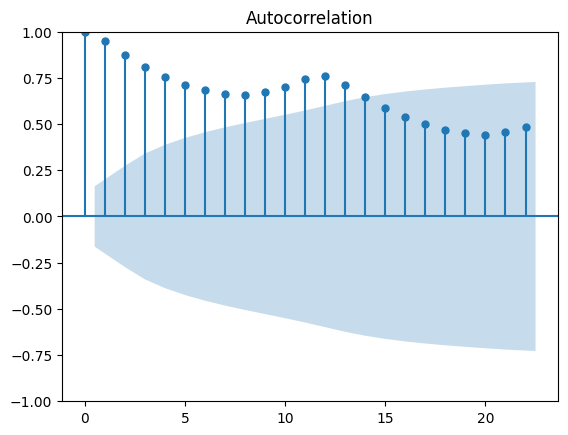

In [12]:
plot_acf(ts)
plt.show()

In [13]:
test_stationary(ts)

Results for DKFuller test: 


tstatistic               0.815369
pvalue                   0.991880
no_lags                 13.000000
obs                    130.000000
criticalvalue (1%)      -3.481682
criticalvalue (5%)      -2.884042
criticalvalue (10%)     -2.578770
dtype: float64

In [14]:
ts_final = ts.diff().dropna()

model = auto_arima(ts_final, seasonal=True, trace=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=4.61 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1033.479, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1022.316, Time=0.78 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1022.905, Time=0.89 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1031.508, Time=0.09 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1022.343, Time=0.23 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1021.137, Time=2.16 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=11.25 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=1022.411, Time=1.64 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1034.068, Time=1.47 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=1023.008, Time=2.90 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=1022.906, Time=3.48 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=1021.017, Time=2.70 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1022.315, Time=0.94 sec
 ARIMA(0,0,1)(2,1,1)[12] int

In [15]:
print(model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  143
Model:             SARIMAX(0, 0, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Mon, 13 Nov 2023   AIC                           1019.179
Time:                                     22:57:09   BIC                           1030.680
Sample:                                 02-01-1949   HQIC                          1023.852
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      

In [16]:
forecast = model.predict(10)

forecast

1961-01-01    19.346932
1961-02-01   -24.244912
1961-03-01    36.280007
1961-04-01    36.323602
1961-05-01    14.329657
1961-06-01    57.816446
1961-07-01    89.458676
1961-08-01   -13.228999
1961-09-01   -96.797005
1961-10-01   -50.216336
Freq: MS, dtype: float64

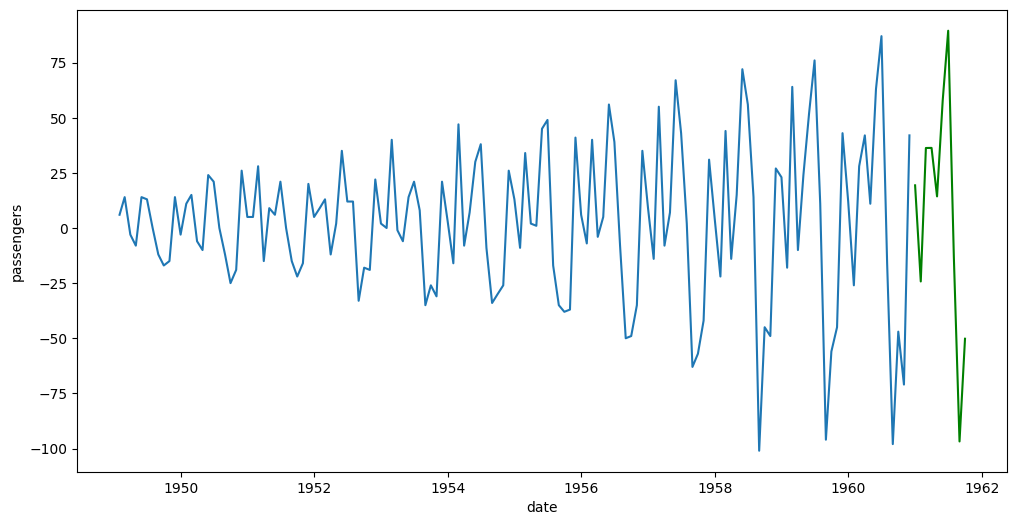

In [17]:
fig, axis = plt.subplots(figsize=(12, 6))

sns.lineplot(data=ts_final)
sns.lineplot(data=forecast, c='green')

plt.show()